<h1><font color="#113D68" size=6>TINTOlib: Converting Tidy Data into Images</font></h1>

<br><br>
<div style="text-align: right">
<font color="#113D68" size=3>Manuel Castillo-Cara</font><br>
<font color="#113D68" size=3>Raúl García-Castro</font><br>
<font color="#113D68" size=3>Jiayun Liu</font><br>

</div>

---

In [1]:
# Standard library imports
import os
import random
import matplotlib.pyplot as plt

# Third-party library imports
import numpy as np
import pandas as pd

# Custom TINTO library imports
from TINTOlib.tinto import TINTO
from TINTOlib.supertml import SuperTML
from TINTOlib.igtd import IGTD
from TINTOlib.refined import REFINED
from TINTOlib.barGraph import BarGraph
from TINTOlib.distanceMatrix import DistanceMatrix
from TINTOlib.combination import Combination
from TINTOlib.featureWrap import FeatureWrap
from TINTOlib.bie import BIE

## DATASET

In [2]:
SEED = 64
# SET RANDOM SEED FOR REPRODUCIBILITY
random.seed(SEED)
np.random.seed(SEED)

In [3]:
# Create variable to store dataset name
dataset_name = 'boston'
results_path = f'./logs/Regression/{dataset_name}/ViT_Regression'

In [4]:
df = pd.read_csv(f"../Dataset/Regression/{dataset_name}.csv")

In [5]:
df.shape

(506, 14)

In [6]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


## Create images with TINTOlib

We prepare the declaration of the classes with the TINTOlib method we want to transform. Note that TINTOlib has several methods and we will have to choose one of them since each method generates different images.

In addition, we establish the paths where the dataset is located and also the folder where the images will be created.

In [7]:
# Get the shape of the dataframe
num_columns = df.shape[1]

# Calculate number of columns - 1
columns_minus_one = num_columns - 1

# Calculate number of columns - 2 if multi objective...
# columns_minus_one = num_columns - 2

# Calculate the square root for image size
import math
image_size = math.ceil(math.sqrt(columns_minus_one))
print(image_size)

4


In [8]:
#Select the model and the parameters
#problem_type = "supervised"
problem_type = "regression"

# Transformation methods
image_model = TINTO(problem=problem_type, blur=True, option='maximum', pixels=30, random_seed=SEED)
name = f"TINTO_blur_maximum_30"
#image_model = REFINED(problem=problem_type, random_seed=SEED)
#name = f"REFINED"
#image_model = IGTD(problem=problem_type, scale=[image_size,image_size], fea_dist_method='Euclidean', image_dist_method='Euclidean', error='abs', max_step=30000, val_step=300, random_seed=SEED)
#name = f"IGTD_fEuclidean_iEuclidean_abs"
#image_model = BarGraph(problem=problem_type, zoom=2)
#name = f"BarGraph_zoom2"
#image_model = DistanceMatrix(problem=problem_type, zoom=2)
#name = f"DistanceMatrix_zoom2"
#image_model = Combination(problem=problem_type, zoom=2)
#name = f"Combination_zoom2"
#image_model = SuperTML(problem=problem_type, font_size=30, feature_importance=True, random_seed=SEED)
#name = f"SuperTML-VF_FS30"
#image_model = FeatureWrap(problem = problem_type, bins=10)
#name = f"FeatureWrap_bins10"
#image_model = BIE(problem = problem_type)
#name = f"BIE"

#Define the dataset path and the folder where the images will be saved
results_folder = f"./Results/Regression/ViT+MLP/{dataset_name}_{name}"
images_folder = f"./Synthetic_images/Regression/images_{dataset_name}_{name}"

<div class="alert alert-block alert-info">

<i class="fa fa-info-circle" aria-hidden="true"></i>
You can see all information about TINTOlib documentation in [PyPI](https://tintolib.readthedocs.io/en/latest/installation.html)

In this section, we generate images from the dataset using three key functions of the image generation model:

- fit: Trains the image generation model without generating images. This function is used exclusively for training purposes.
- fit_transform: Trains the image generation model and simultaneously generates images for the dataset. This function is applied to the training dataset, where the model is both trained and used to create images.
- transform: Generates images using the pre-trained model. After training on the training dataset, this function is used to generate images for unseen data, such as validation and test datasets.

Each row in the dataset is transformed into a unique image, ensuring that the number of generated images matches the number of rows in the dataset. The resulting datasets include paths to these images, which are then combined with the original data for further processing.

Split the data into training, validation, and test sets:

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_val = train_test_split(df, test_size=0.20, random_state=SEED)
X_val, X_test = train_test_split(X_val, test_size=0.50, random_state=SEED)

X_train = X_train.reset_index(drop=True)
X_val = X_val.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)

Define a function to streamline the repetitive process of generating images, updating paths, and combining datasets:

In [10]:
def process_dataset(X, folder_name, generate_function, problem_type):
    """
    Handles dataset processing, including image generation, path updates, 
    and combining the dataset with image paths.

    Parameters:
    ----------
    X : DataFrame
        The dataset to process (training, validation, or test).
    
    folder_name : str
        The name of the folder where generated images will be stored 
        (e.g., 'train', 'val', 'test').
    
    generate_function : function
        The function used for training and generating images. It can be one of the following:
        - `fit`: Trains the model without generating images.
        - `fit_transform`: Trains the model and generates images for the dataset (used for training).
        - `transform`: Uses the pre-trained model to generate images for validation and testing.
    
    problem_type : str
        The type of problem being addressed (e.g., regression, supervised).
        This is used to locate the corresponding `.csv` file containing image paths.

    Returns:
    --------
    X_processed : DataFrame
        The dataset with updated image paths and raw tabular data, ready for further processing.
    
    y_processed : Series
        The labels corresponding to the dataset (target values).
    """
    # Generate the images if the folder does not exist
    folder_path = f"{images_folder}/{folder_name}"
    if not os.path.exists(folder_path):
        generate_function(X, folder_path)
    else:
        print(f"The images for {folder_name} are already generated")

    # Load image paths
    img_paths = os.path.join(folder_path, f"{problem_type}.csv")
    imgs = pd.read_csv(img_paths)

    # Update image paths
    imgs["images"] = folder_path + "/" + imgs["images"]

    # Combine datasets
    combined_dataset = pd.concat([imgs, X], axis=1)

    # Split data and labels
    X_processed = combined_dataset.drop(df.columns[-1], axis=1).drop("values", axis=1)
    y_processed = combined_dataset["values"]

    return X_processed, y_processed


In [11]:
### X_train
X_train, y_train = process_dataset(X_train, "train", image_model.fit_transform, problem_type)

In [12]:
### X_val
X_val, y_val = process_dataset(X_val, "val", image_model.transform, problem_type)

In [13]:

### X_test
X_test, y_test = process_dataset(X_test, "test", image_model.transform, problem_type)

In [14]:
import cv2
from sklearn.preprocessing import MinMaxScaler

#TIDY DATA SPLITTED
X_train_num = X_train.drop("images",axis=1)
X_val_num = X_val.drop("images",axis=1)
X_test_num = X_test.drop("images",axis=1)

#IMAGES
# For 3 channels (RGB)
X_train_img = np.array([cv2.imread(img) for img in X_train["images"]])
X_val_img = np.array([cv2.imread(img) for img in X_val["images"]])
X_test_img = np.array([cv2.imread(img) for img in X_test["images"]])

# For 1 channels (GRAY SCALE)
"""X_train_img = np.array([cv2.imread(img,cv2.IMREAD_GRAYSCALE) for img in X_train["images"]])
X_val_img = np.array([cv2.imread(img,cv2.IMREAD_GRAYSCALE) for img in X_val["images"]])
X_test_img = np.array([cv2.imread(img,cv2.IMREAD_GRAYSCALE) for img in X_test["images"]])"""

# Create a MinMaxScaler object
scaler = MinMaxScaler()

# Scale numerical data
X_train_num = scaler.fit_transform(X_train_num)
X_val_num = scaler.transform(X_val_num)
X_test_num = scaler.transform(X_test_num)

attributes = X_train_num.shape[1]
height, width, channels = X_train_img[0].shape
imgs_shape = (height, width, channels)

print("Images shape: ",imgs_shape)
print("Attributres: ",attributes)
pixels=X_train_img[0].shape[0]
print("Image size (pixels):", pixels)

Images shape:  (30, 30, 3)
Attributres:  13
Image size (pixels): 30


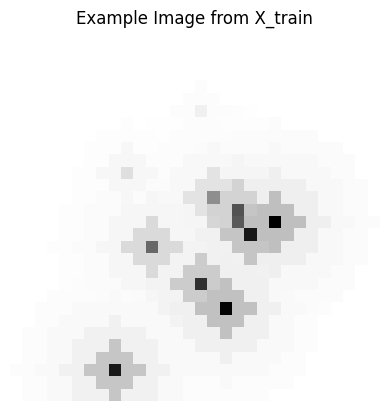

In [15]:
# Plot an example image (e.g., the first image in the array)
example_image = X_train_img[0]

# Convert the image from BGR (OpenCV default) to RGB for correct color display
example_image_rgb = cv2.cvtColor(example_image, cv2.COLOR_BGR2RGB)

# Display the image using matplotlib
plt.imshow(example_image_rgb)
plt.title("Example Image from X_train")
plt.axis('off')  # Hide the axis for a cleaner look
plt.show()

In [16]:
X_train_num

array([[0.06108607, 0.        , 0.64662757, ..., 0.80851064, 0.89507792,
        0.4415011 ],
       [0.00251062, 0.        , 0.37133431, ..., 0.63829787, 0.99488123,
        0.25496689],
       [0.012639  , 0.        , 0.28152493, ..., 0.89361702, 0.90738313,
        0.575883  ],
       ...,
       [0.00155603, 0.        , 0.35007331, ..., 0.55319149, 0.98638358,
        0.32781457],
       [0.06390286, 0.        , 0.64662757, ..., 0.80851064, 0.98935902,
        0.3656181 ],
       [0.05714125, 0.        , 0.64662757, ..., 0.80851064, 0.97022038,
        0.42880795]])